<div style='float:left'>
<img style="-webkit-user-select: none" src="https://www.uoc.edu/portal/_resources/common/imatges/marca_UOC/marca_UOC_web.jpg">
<h1>
B2.332-A7 bagging.r_Bagging
</h1>

## Descripción:

### En este ejemplo se muestra como generar un clasificador arbol de decisión y como mejorarlo con técnicas de bagging

## Procedimiento:

### Instalar los packages necesarios en caso de no haberlo hecho anteriormente

In [1]:
if(!require(mlbench)){
    install.packages('mlbench',repos='http://cran.es.r-project.org')
    require(mlbench)
}
if(!require(car)){
    install.packages('car',repos='http://cran.es.r-project.org')
    require(car)
}
if(!require(caret)){
    install.packages('caret',repos='http://cran.es.r-project.org')
    require(caret)
}
if(!require(caretEnsemble)){
    install.packages('caretEnsemble',repos='http://cran.es.r-project.org')
    require(caretEnsemble)
}
if(!require(e1071)){
    install.packages('e1071',repos='http://cran.es.r-project.org')
    require(e1071)
}
if(!require(rpart)){
    install.packages('rpart',repos='http://cran.es.r-project.org')
    require(rpart)
}
if(!require(ipred)){
    install.packages('ipred',repos='http://cran.es.r-project.org')
    require(ipred)
}
if(!require(plyr)){
    install.packages('plyr',repos='http://cran.es.r-project.org')
    require(plyr)
}
set.seed(17)

Loading required package: mlbench
Warning message:
"package 'mlbench' was built under R version 3.3.3"Loading required package: car
Warning message:
"package 'car' was built under R version 3.3.3"Loading required package: caret
Loading required package: lattice
Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.3.3"Loading required package: caretEnsemble
Warning message:
"package 'caretEnsemble' was built under R version 3.3.3"
Attaching package: 'caretEnsemble'

The following object is masked from 'package:ggplot2':

    autoplot

Loading required package: e1071
Warning message:
"package 'e1071' was built under R version 3.3.3"Loading required package: rpart
Loading required package: ipred
Warning message:
"package 'ipred' was built under R version 3.3.3"Loading required package: plyr


### Carga de los datos. 

In [2]:
wdbc=read.table(  url("https://archive.ics.uci.edu/ml/machine-learning-databases/breast-cancer-wisconsin/breast-cancer-wisconsin.data"), 
  sep=",", header=FALSE)
dim(wdbc)


[1] 699  11

### Preparamos los datos para crear el modelo

In [3]:
wdbc$V7=as.numeric(recode(wdbc$V7, "'?'=NA"))
wdbc=wdbc[complete.cases(wdbc),]
dataset <- wdbc[,(2:11)]

### Parámetros de creación del modelo

In [4]:
# Paso de kfolds
control <- trainControl(method="repeatedcv", number=10, repeats=3, savePredictions = TRUE)
# Metrica de calidad % instancias correctas sobre total
metric <- "Accuracy"

### Creamos un primer modelo de árbol.

In [5]:
model.cart <- train(as.factor(V11)~., data=dataset, method="rpart", metric=metric, trControl=control)

### Matriz de confusión

In [6]:
confusionMatrix(model.cart)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    2    4
         2 61.2  2.8
         4  3.8 32.2
                            
 Accuracy (average) : 0.9346


###  Mostramos todas sus características.

CART 

683 samples
  9 predictor
  2 classes: '2', '4' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 616, 614, 615, 614, 615, 614, ... 
Resampling results across tuning parameters:

  cp          Accuracy   Kappa    
  0.02092050  0.9346048  0.8573584
  0.05439331  0.9218588  0.8298219
  0.79079498  0.8402590  0.5876861

Accuracy was used to select the optimal model using  the largest value.
The final value used for the model was cp = 0.0209205. 


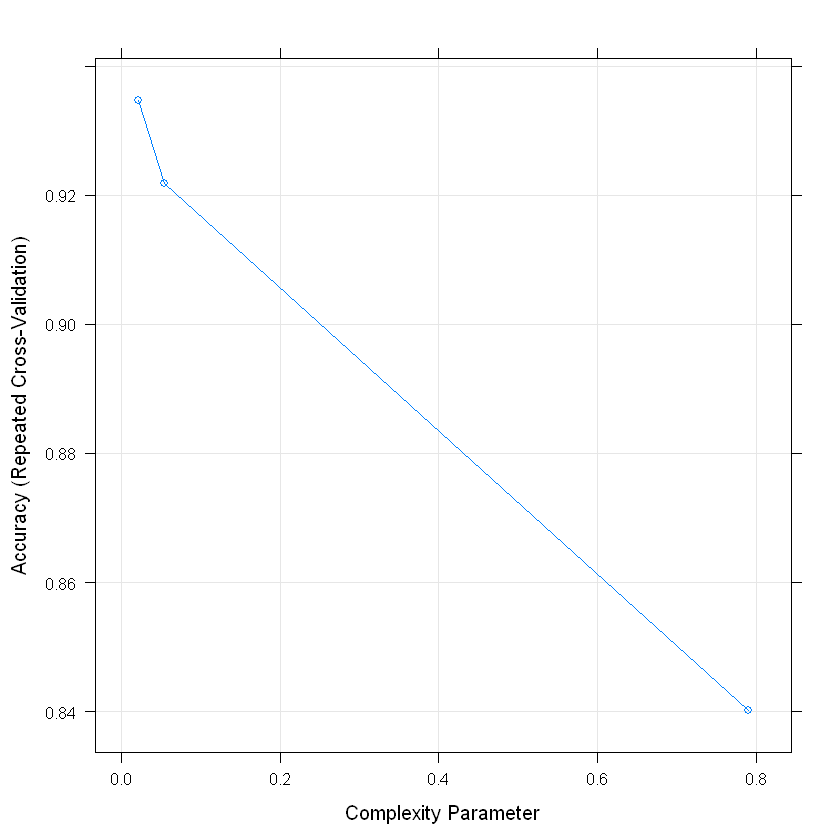

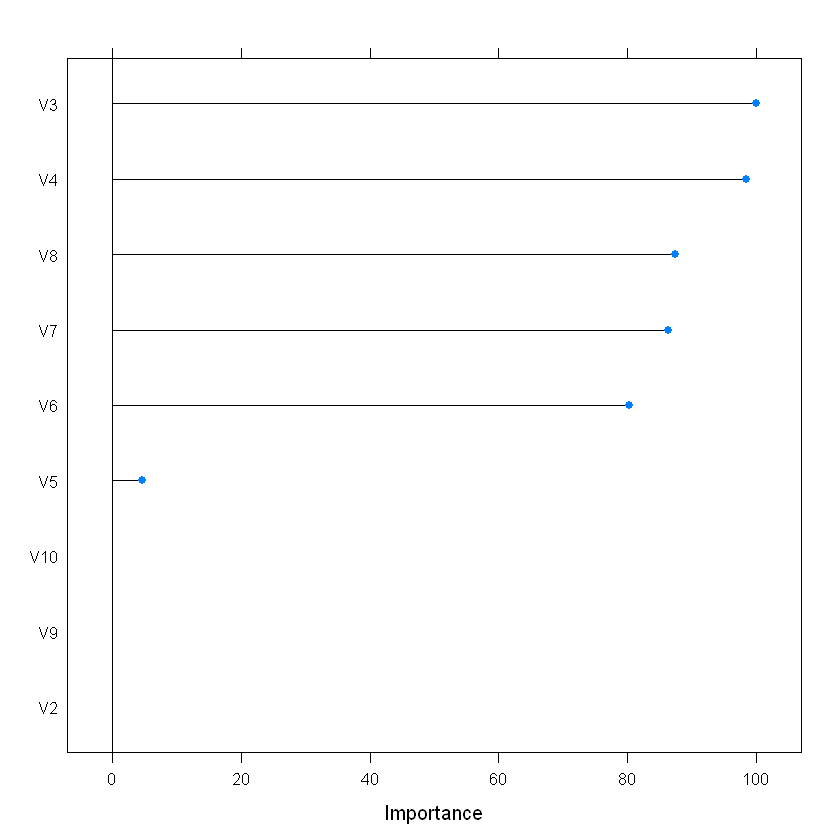

In [7]:
print(model.cart)
plot(model.cart)
ctreeVarImp = varImp(model.cart)
plot(ctreeVarImp)

### Creación de un árbol con el método bagged

In [8]:
model.treebag <- train(as.factor(V11)~., data=dataset, method="treebag",metric=metric, trControl=control)

### Matriz de confusión

In [9]:
confusionMatrix(model.treebag)

Cross-Validated (10 fold, repeated 3 times) Confusion Matrix 

(entries are percentual average cell counts across resamples)
 
          Reference
Prediction    2    4
         2 62.6  1.7
         4  2.4 33.3
                           
 Accuracy (average) : 0.959


###  Mostramos todas sus características.

Bagged CART 

683 samples
  9 predictor
  2 classes: '2', '4' 

No pre-processing
Resampling: Cross-Validated (10 fold, repeated 3 times) 
Summary of sample sizes: 615, 614, 614, 614, 615, 615, ... 
Resampling results:

  Accuracy   Kappa    
  0.9590356  0.9105653

 


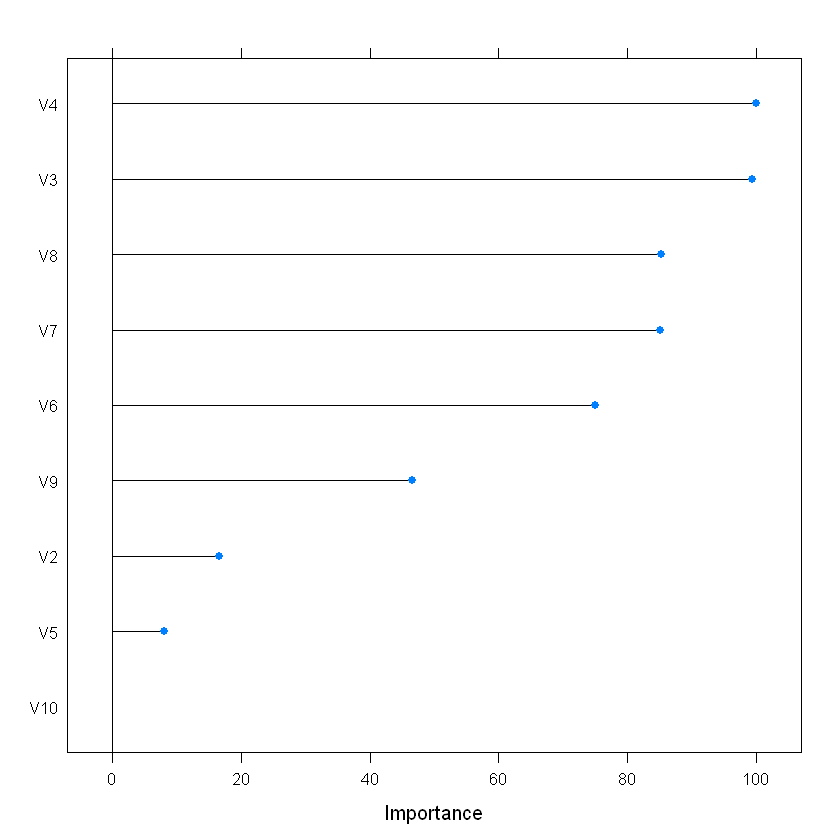

In [10]:
print(model.treebag)
ctreeVarImp = varImp(model.treebag)
plot(ctreeVarImp)

### Sumarizamos y comparamos los datos de ambos modelos


Call:
summary.resamples(object = bagging_results)

Models: treebag, cart 
Number of resamples: 30 

Accuracy 
          Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
treebag 0.9118  0.9420 0.9562 0.9590  0.9852 1.0000    0
cart    0.8841  0.9118 0.9412 0.9346  0.9564 0.9851    0

Kappa 
          Min. 1st Qu. Median   Mean 3rd Qu.   Max. NA's
treebag 0.8068  0.8721 0.9051 0.9106  0.9674 1.0000    0
cart    0.7493  0.8104 0.8712 0.8574  0.9030 0.9672    0


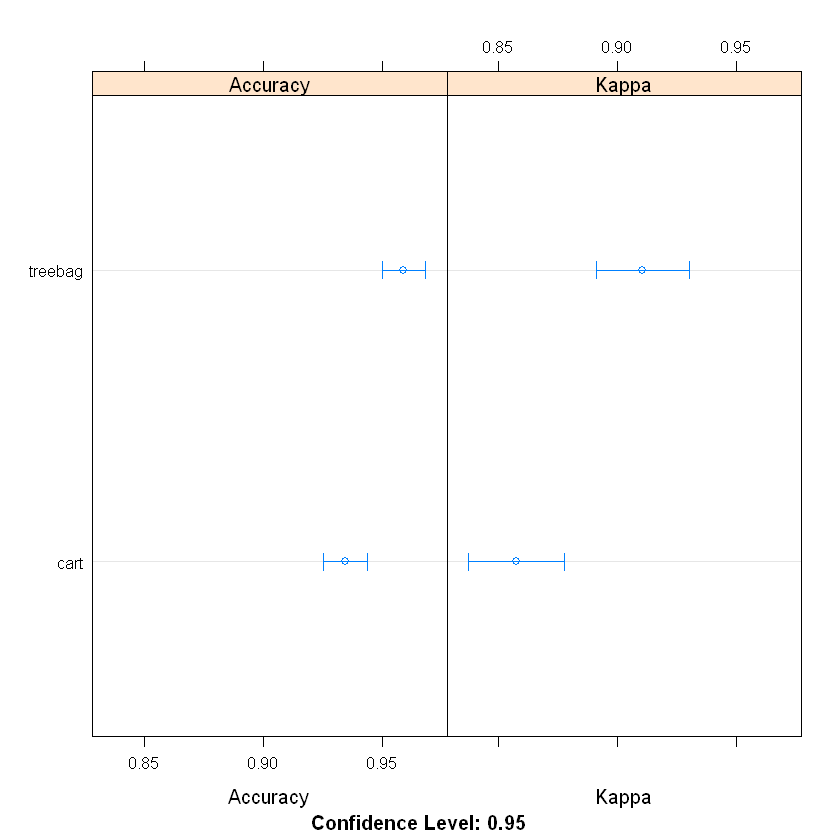

In [11]:
bagging_results <- resamples(list(treebag=model.treebag, cart=model.cart))
summary(bagging_results)
dotplot(bagging_results)